# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [ ]:
# Define a function for the bayes_rule

def bayes_rule(priors, likelihoods):
    post = np.divide(np.multiply(priors, likelihoods), sum(np.multiply(priors, likelihoods)))
    return post

In [37]:
# Obtain the number of cookies for each bowl 
priors = np.array([40/80,40/80])

# Obtain the proportions of vanilla cookies on each bowl 
likelihoods = np.array([30/40,20/40])

# Determine the probability with the given information
bowls_prob = bayes_rule(priors, likelihoods)

print(f'The probability of the vanilla cookie being in bowl 1 is: {bowls_prob[0]}')

The probability of the vanilla cookie being in bowl 1 is: 0.6


What is the probability that it came from Bowl 2?

In [38]:
print(f'The probability of the vanilla cookie being in bowl 2 is: {bowls_prob[1]}')

The probability of the vanilla cookie being in bowl 2 is: 0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [41]:
# Since the likelihoods are the proportions and there are only two types 
# of cookies, we can substract one by the likelihoods to obtain the desired
# values.

bowls_prob = bayes_rule(priors, 1-likelihoods)

print(f'The probability of chocolate cookie being in bowl 1: {bowls_prob[0]}')
print(f'The probability of chocolate cookie being in bowl 2: {bowls_prob[1]}')

The probability of chocolate cookie being in bowl 1: 0.3333333333333333
The probability of chocolate cookie being in bowl 2: 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [21]:
# We have two bags so there is a 50%-50% of grabbing a candy from them
priors = np.array([1/2,1/2])

# The proportions are different for each bag, therefore the probability
# of drawing a yellow color of bag 1 and a green of bag 2 is computed for
# the first vector, then the same is done now first for bag 2 and then bag 1.

likelihoods = np.array([.2*.2,.1*.14])

ans = bayes_rule(priors, likelihoods)
print(f'Probability yellow came from bag 1: {ans[0]}')

Probability yellow came from gab 1: 0.7407407407407408


What is the probability that the yellow candy came from Bag 2?

In [22]:
print(f'Probability yellow came from bag 2: {ans[1]}')

Probability yellow came from bag 1: 0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [25]:
# They should be the same but complementary, because the procedure is the same

print(f'Probability grren came from bag 1 and bag 2 respectively: {1-ans}')

Probability grren came from bag 1 and bag 2 respectively: [0.25925926 0.74074074]


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [36]:
# At the beggining one has
priors = [1/3,1/3,1/3]
likelihoods=[1,1,1]

# However, after showing the other door, the likelyhoods change:
# If the car is behind DoorA, Monty will show goat behind door 2 half the time
# If the car is behind doorB, Monty NEVER show us a goat behind Door B, 
# finally if the car is behind Door C, monty show us a goat behind Door B
# everytime

likelihoods=[1/2,0,1]
ans = bayes_rule(priors, likelihoods)
ans

# Door A has a probability of 1/3, door C has a probability of 2/3

array([0.33333333, 0.        , 0.66666667])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

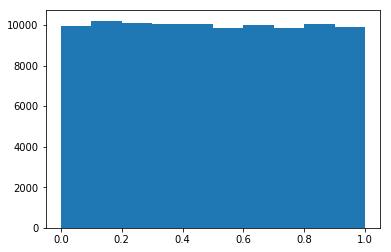

In [70]:

# We start with the asumption that at the beggining the sign up for land
# scaping services are equally likely
s=100000
prior = pd.Series(np.random.uniform(0,1,size=s))
plt.hist(prior)
plt.show()

generative_model = lambda x: np.random.binomial(100, x)

# 100 people came to the site and 14 of them singed up. 
observed = 14

# Create a list that contains the simulated results:
sim_data = [generative_model(p) for p in prior]

# Posterior distribution will only select the values 
# from the prior distribution that generated inntances where the result
# matched the observed result of 14 purahces
posterior = prior[list(map(lambda x: x==observed, sim_data))]

Produce a set of descriptive statistics for the posterior distribution.

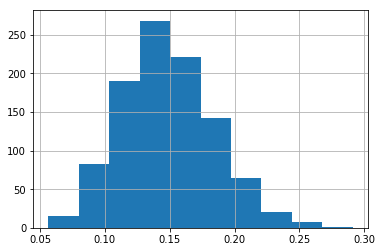

count    1013.000000
mean        0.148662
std         0.035436
min         0.056481
25%         0.123329
50%         0.145458
75%         0.172565
max         0.291160
dtype: float64

In [72]:
posterior.hist()
plt.show()

# THe probability of someone making a purchase is likely between 10% and
# 20% being more likely to be at 14%.
posterior.describe()

In [ ]:
# The mean and median are apprixmately in 14

What is the 90% credible interval range?

In [75]:
# We need to have 5% from one tail and other 5% from the other, obtaining
print(posterior.quantile(.05), '|', posterior.quantile(.95))

0.09415243763772532 | 0.2087679217723295


What is the Maximum Likelihood Estimate?

In [77]:
rounded = posterior.round(2)
mode = posterior.round(2).mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.12043435340572557
